In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

JSON FAILŲ PAVERTIMAS Į CSV:

In [4]:
json_files = ['ei_2018_12_31.json', 'ei_2019_12_31.json', 'ei_2020_12_31.json', 'ei_2021_12_31.json', 'ei_2022_12_31.json']


for file_path in json_files:
    df = pd.read_json(file_path)
    
    csv_file_path = file_path.replace('.json', '.csv') 
    df.to_csv(csv_file_path, index=False) 


In [7]:
ei_2018 = pd.read_csv('ei_2018_12_31.csv')
ei_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24703 entries, 0 to 24702
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   registrokodas                 24703 non-null  object 
 1   dataLaikas                    24703 non-null  object 
 2   registravimoData              24703 non-null  object 
 3   paskutinioRedagavimoLaikas    24703 non-null  object 
 4   iskaitinis                    24703 non-null  int64  
 5   rusis                         24703 non-null  object 
 6   schema1                       24703 non-null  object 
 7   schema2                       24703 non-null  object 
 8   dalyviuSkaicius               24703 non-null  int64  
 9   zuvusiuSkaicius               24703 non-null  int64  
 10  zuvVaiku                      24703 non-null  int64  
 11  suzeistuSkaicius              24703 non-null  int64  
 12  suzeistaVaiku                 24703 non-null  int64  
 13  t

In [14]:
ei_2019 = pd.read_csv('ei_2019_12_31.csv')

In [9]:
ei_2020 = pd.read_csv('ei_2020_12_31.csv')

In [10]:
ei_2021 = pd.read_csv('ei_2021_12_31.csv')

In [11]:
ei_2022 = pd.read_csv('ei_2022_12_31.csv')

PATIKRINIMAS AR VISOSE LENTELĖSE YRA TIE PATYS STULPELIAI TA PAČIA TVARKA:

In [15]:
csv_files = ['ei_2018_12_31.csv', 'ei_2019_12_31.csv', 'ei_2020_12_31.csv', 'ei_2021_12_31.csv', 'ei_2022_12_31.csv']

def get_columns(file_path):
    return pd.read_csv(file_path, nrows=0).columns.tolist()


base_columns = get_columns(csv_files[0])

all_match = True

for file_path in csv_files[1:]:
    current_columns = get_columns(file_path)
    if current_columns != base_columns:
        all_match = False
        print(f"Columns in {file_path} do not match with the base file columns.")
        break  


if all_match:
    print("All CSV files have the same columns in the same order.")


All CSV files have the same columns in the same order.


VISŲ FAILŲ SUJUNGIMAS Į VIENĄ:

In [16]:
csv_files = ['ei_2018_12_31.csv', 'ei_2019_12_31.csv', 'ei_2020_12_31.csv', 'ei_2021_12_31.csv', 'ei_2022_12_31.csv']

dataframes = [pd.read_csv(file) for file in csv_files]

merged_df = pd.concat(dataframes, ignore_index=True)

In [17]:
merged_df.to_csv('ei_2018_2022.csv', index=False)

In [3]:
ei_2018_2022 = pd.read_csv('ei_2018_2022.csv')
ei_2018_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123368 entries, 0 to 123367
Data columns (total 52 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   registrokodas                 123368 non-null  object 
 1   dataLaikas                    123368 non-null  object 
 2   registravimoData              123368 non-null  object 
 3   paskutinioRedagavimoLaikas    123357 non-null  object 
 4   iskaitinis                    123368 non-null  int64  
 5   rusis                         123357 non-null  object 
 6   schema1                       123357 non-null  object 
 7   schema2                       123357 non-null  object 
 8   dalyviuSkaicius               123357 non-null  float64
 9   zuvusiuSkaicius               123368 non-null  int64  
 10  zuvVaiku                      123368 non-null  int64  
 11  suzeistuSkaicius              123368 non-null  int64  
 12  suzeistaVaiku                 123368 non-nul

NULL REIKŠMIŲ PATIKRINIMAS DUOMENYSE:

In [4]:
null_reiksmiu_skaicius = ei_2018_2022.isnull().sum()
null_reiksmiu_skaicius

registrokodas                        0
dataLaikas                           0
registravimoData                     0
paskutinioRedagavimoLaikas          11
iskaitinis                           0
rusis                               11
schema1                             11
schema2                             11
dalyviuSkaicius                     11
zuvusiuSkaicius                      0
zuvVaiku                             0
suzeistuSkaicius                     0
suzeistaVaiku                        0
tpSkaicius                          11
policijosTpSkaicius             122789
apgadintuTpSkaicius               3994
apgadintuPolicijosTpSkaicius    123042
policijosIstaigaL1                   0
policijosIstaigaL2              119649
iforminusiIstaigaL1              23326
iforminusiIstaigaL2              89690
ivykioVieta                          0
vietosSavivaldybeTipas             831
savivaldybe                          0
gatve                            33332
namas                    

PAŠALINAMI NEREIKALINGI STULPELIAI:

In [5]:
ei_2018_2022 = ei_2018_2022.drop(columns=['policijosTpSkaicius','apgadintuPolicijosTpSkaicius','policijosIstaigaL2','iforminusiIstaigaL1','iforminusiIstaigaL2','gatve','namas','kitaGatveSankryzoje','kelioPavadinimas','kelioReiksme','atstumas','kelioApsvietimas','nuliamentisVeiksnys','sankryzosTipas','kelioElementas1','kelioElementas2'])

In [7]:
ei_2018_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123368 entries, 0 to 123367
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   registrokodas                 123368 non-null  object 
 1   dataLaikas                    123368 non-null  object 
 2   registravimoData              123368 non-null  object 
 3   paskutinioRedagavimoLaikas    123357 non-null  object 
 4   iskaitinis                    123368 non-null  int64  
 5   rusis                         123357 non-null  object 
 6   schema1                       123357 non-null  object 
 7   schema2                       123357 non-null  object 
 8   dalyviuSkaicius               123357 non-null  float64
 9   zuvusiuSkaicius               123368 non-null  int64  
 10  zuvVaiku                      123368 non-null  int64  
 11  suzeistuSkaicius              123368 non-null  int64  
 12  suzeistaVaiku                 123368 non-nul

UŽTIKRINAME, KAD BŪTŲ TIK 2018-2022 METŲ DUOMENYS:

In [32]:
ei_2018_2022['dataLaikas'] = pd.to_datetime(ei_2018_2022['dataLaikas'])

ei_2018_2022 = ei_2018_2022[(ei_2018_2022['dataLaikas'].dt.year >= 2018) & (ei_2018_2022['dataLaikas'].dt.year <= 2022)]


In [25]:
ei_2018_2022 = ei_2018_2022[(ei_2018_2022['dataLaikas'].dt.year >= 2018) & (ei_2018_2022['dataLaikas'].dt.year <= 2022)].copy()

In [33]:
ei_2018_2022['metai'] = ei_2018_2022['dataLaikas'].dt.year
ei_2018_2022['menuo'] = ei_2018_2022['dataLaikas'].dt.month

C:\Users\krist\AppData\Local\Temp\ipykernel_9340\1093134840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ei_2018_2022['metai'] = ei_2018_2022['dataLaikas'].dt.year
C:\Users\krist\AppData\Local\Temp\ipykernel_9340\1093134840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ei_2018_2022['menuo'] = ei_2018_2022['dataLaikas'].dt.month


In [27]:
ei_2018_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123263 entries, 0 to 123367
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   registrokodas                 123263 non-null  object        
 1   dataLaikas                    123263 non-null  datetime64[ns]
 2   registravimoData              123263 non-null  object        
 3   paskutinioRedagavimoLaikas    123263 non-null  object        
 4   iskaitinis                    123263 non-null  int64         
 5   rusis                         123263 non-null  object        
 6   schema1                       123263 non-null  object        
 7   schema2                       123263 non-null  object        
 8   dalyviuSkaicius               123263 non-null  float64       
 9   zuvusiuSkaicius               123263 non-null  int64         
 10  zuvVaiku                      123263 non-null  int64         
 11  suzeistuSkaicius  

# HIPOTEZĖS
- Daugiausia eismo įvykių įvyksta blogomis oro sąlygomis
- Eismo situacija per penkmetį gerėja - mažėja įvykių, sužeistųjų ir žuvusiųjų skaičius
- Neblaivių vairuotojų sukeltų eismo įvykių per penkmetį mažėja

In [28]:
# EISMO ĮVYKIŲ RŪŠIŲ PASISKIRSTYMAS
ivykiu_rusiu_pasiskirstymas = ei_2018_2022['rusis'].value_counts()
ivykiu_rusiu_pasiskirstymas

rusis
Susidūrimas                                     31379
Kiti eismo įvykiai                              24187
Užvažiavimas ant gyvūno                         23549
Susidūrimas su stovinčia transporto priemone    22881
Užvažiavimas ant kliūties                        9586
Užvažiavimas ant pėsčiojo                        4578
Apvirtimas                                       3777
Susidūrimas su dviračiu                          2507
Susidūrimas su motociklu                          561
Susidūrimas su mopedu                             222
Susidūrimas su bėgine transporto priemone          36
Name: count, dtype: int64

In [34]:
# ĮVYKIŲ ĮVYKIŲ SKAIČIUS KIEKVIENAIS METAIS
metine_ivykiu_tendencija = ei_2018_2022.groupby('metai').size()
metine_ivykiu_tendencija

metai
2018    24694
2019    28419
2020    23005
2021    23739
2022    23406
dtype: int64

In [30]:
# ĮVYKIŲ ĮVYKIŲ SKAIČIUS KIEKVIENĄ MĖNESĮ PER 2018-2022 LAIKOTARPĮ
menesine_ivykiu_tendencija = ei_2018_2022.groupby('menuo').size()
menesine_ivykiu_tendencija

menuo
1     10127
2      8874
3      8746
4      8850
5     11350
6     10570
7     10279
8     10361
9     10344
10    11237
11    10904
12    11621
dtype: int64

In [34]:
# APGADINTŲ TP SKAIČIUS KIEKVIENAIS METAIS
apgadintu_tp_skaicius = ei_2018_2022.groupby('metai')['apgadintuTpSkaicius'].sum().astype(int)

print("Apgadintų transporto priemonių skaičius kiekvienais metais:")
print(apgadintu_tp_skaicius)

Apgadintų transporto priemonių skaičius kiekvienais metais:
metai
2018    31320
2019    35882
2020    27833
2021    28885
2022    27933
Name: apgadintuTpSkaicius, dtype: int32


In [35]:
# SUŽEISTI IR ŽUVĘ SUAUGUSIEJI
suzeistu_skaicius_per_metus = ei_2018_2022.groupby('metai')['suzeistuSkaicius'].sum().astype(int)
zuvusiu_skaicius_per_metus = ei_2018_2022.groupby('metai')['zuvusiuSkaicius'].sum().astype(int)

print("Sužeistų asmenų skaičius kiekvienais metais:")
print(suzeistu_skaicius_per_metus)
print("\nŽuvusių asmenų skaičius kiekvienais metais:")
print(zuvusiu_skaicius_per_metus)

Sužeistų asmenų skaičius kiekvienais metais:
metai
2018    3389
2019    3761
2020    3164
2021    3182
2022    3335
Name: suzeistuSkaicius, dtype: int32

Žuvusių asmenų skaičius kiekvienais metais:
metai
2018    173
2019    186
2020    176
2021    147
2022    120
Name: zuvusiuSkaicius, dtype: int32


In [36]:
# SUŽEISTI IR ŽUVĘ VAIKAI
suzeistu_vaiku_per_metus = ei_2018_2022.groupby('metai')['suzeistaVaiku'].sum().astype(int)
zuvusiu_vaiku_per_metus = ei_2018_2022.groupby('metai')['zuvVaiku'].sum().astype(int)

print("Sužeistų vaikų skaičius kiekvienais metais:")
print(suzeistu_vaiku_per_metus)
print("\nŽuvusių vaikų skaičius kiekvienais metais:")
print(zuvusiu_vaiku_per_metus)

Sužeistų vaikų skaičius kiekvienais metais:
metai
2018    554
2019    588
2020    492
2021    555
2022    565
Name: suzeistaVaiku, dtype: int32

Žuvusių vaikų skaičius kiekvienais metais:
metai
2018    9
2019    8
2020    6
2021    8
2022    4
Name: zuvVaiku, dtype: int32


In [36]:
# EISMO ĮVYKIAI, KURIUOS SUKĖLĖ NEBLAIVŪS ASMENYS
girtu_vairuotoju_ivykiai = ei_2018_2022[(ei_2018_2022['neblaivusKaltininkai'] == 'Taip') |
                                        (ei_2018_2022['apsvaigeKaltininkai'] == 'Taip') |
                                        (ei_2018_2022['atsisakeTikrintisKaltininkai'] == 'Taip')]

girtu_vairuotoju_ivykiai_per_metus = girtu_vairuotoju_ivykiai.groupby('metai').size()

print("Eismo įvykiai, kuriuose dalyvavo neblaivūs vairuotojai kiekvienais metais:")
print(girtu_vairuotoju_ivykiai_per_metus)

Eismo įvykiai, kuriuose dalyvavo neblaivūs vairuotojai kiekvienais metais:
metai
2018    1346
2019    1374
2020    1408
2021    1270
2022    1272
dtype: int64


In [38]:
# METEOROLOGINĖS SĄLYGOS ĮVYKUS EISMO ĮVYKIUI
ivykiu_skaicius_pagal_meteo = ei_2018_2022['meteoSalygos'].value_counts()
ivykiu_skaicius_pagal_meteo

meteoSalygos
Giedra            68533
Apsiniaukę        37804
Lietus             9480
Sniegas, kruša     3954
Rūkas              1552
Lijundra           1227
Stiprus vėjas       417
Pūga                296
Name: count, dtype: int64

In [39]:
# EISMO ĮVYKIAI PAGAL PAROS LAIKĄ
ivykiu_skaicius_pagal_paros_laika = ei_2018_2022['parosMetas'].value_counts()
ivykiu_skaicius_pagal_paros_laika

parosMetas
Diena                 77395
Tamsus paros metas    34351
Sutemos               11517
Name: count, dtype: int64

VIZUALIZACIJOS

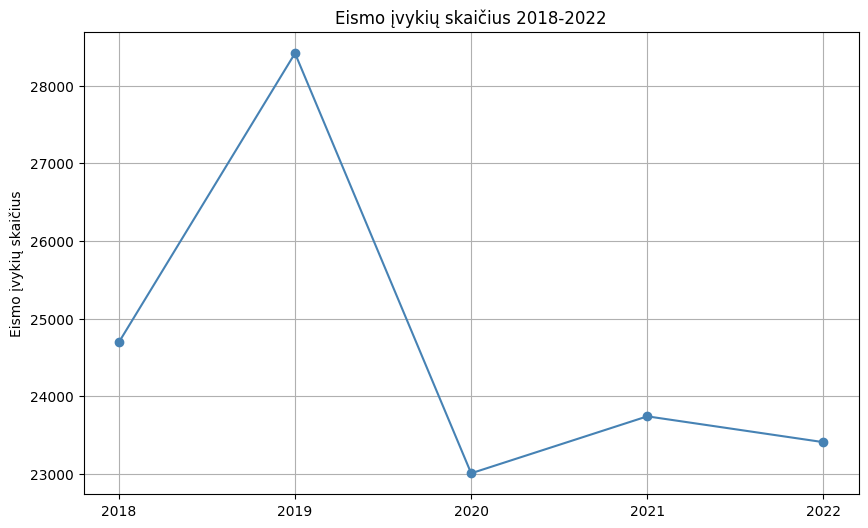

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(metine_ivykiu_tendencija.index, metine_ivykiu_tendencija.values, marker='o', linestyle='-', color='steelblue')

plt.title('Eismo įvykių skaičius 2018-2022')
plt.ylabel('Eismo įvykių skaičius')
plt.grid(True)
plt.xticks(metine_ivykiu_tendencija.index)

plt.show()

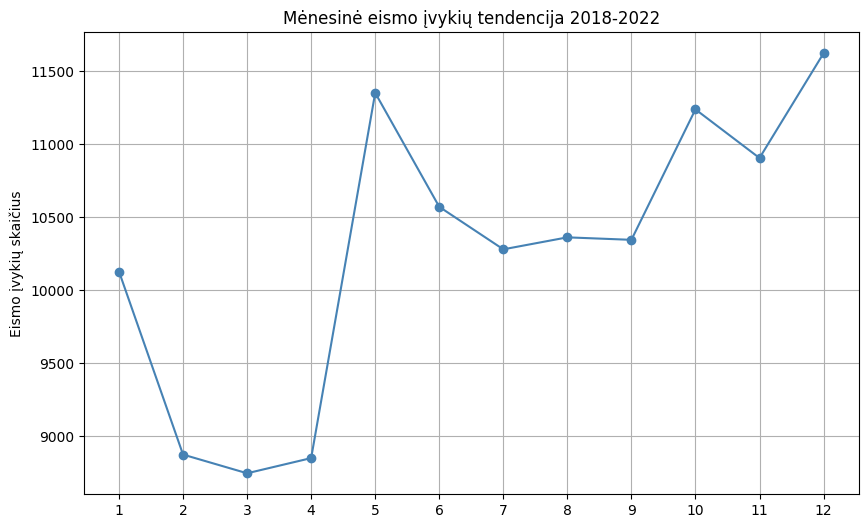

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(menesine_ivykiu_tendencija.index, menesine_ivykiu_tendencija.values, marker='o', linestyle='-', color='steelblue')

plt.title('Mėnesinė eismo įvykių tendencija 2018-2022')
plt.ylabel('Eismo įvykių skaičius')
plt.grid(True)
plt.xticks(range(1, 13))

plt.show()

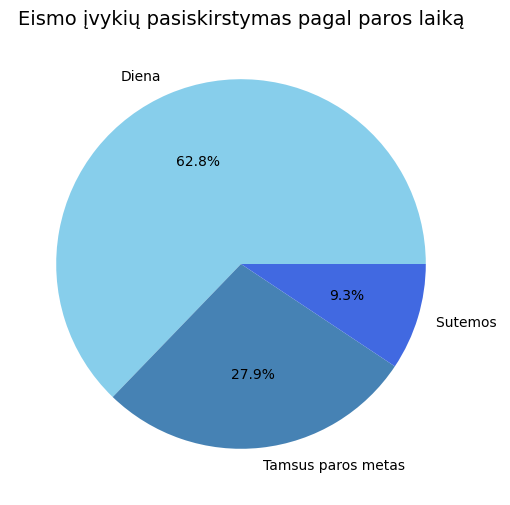

In [40]:
labels = ivykiu_skaicius_pagal_paros_laika.index
sizes = ivykiu_skaicius_pagal_paros_laika.values

plt.figure(figsize = (6,6))
plt.pie(sizes, labels = labels, colors = ['skyblue','steelblue','royalblue'], autopct = '%1.1f%%')
plt.title('Eismo įvykių pasiskirstymas pagal paros laiką', fontsize=14)

plt.show()

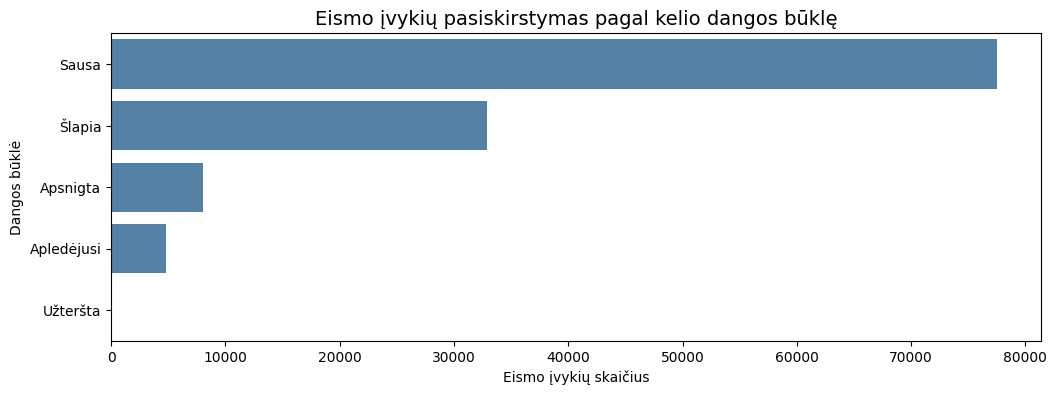

In [26]:
kelio_bukles_ivykiu_skaicius = ei_2018_2022['dangosBukle'].value_counts()

plt.figure(figsize = (12,4))
sns.barplot(x = kelio_bukles_ivykiu_skaicius.values, y = kelio_bukles_ivykiu_skaicius.index, color = 'steelblue')
plt.title('Eismo įvykių pasiskirstymas pagal kelio dangos būklę', fontsize=14)
plt.xlabel('Eismo įvykių skaičius')
plt.ylabel('Dangos būklė')

plt.show()

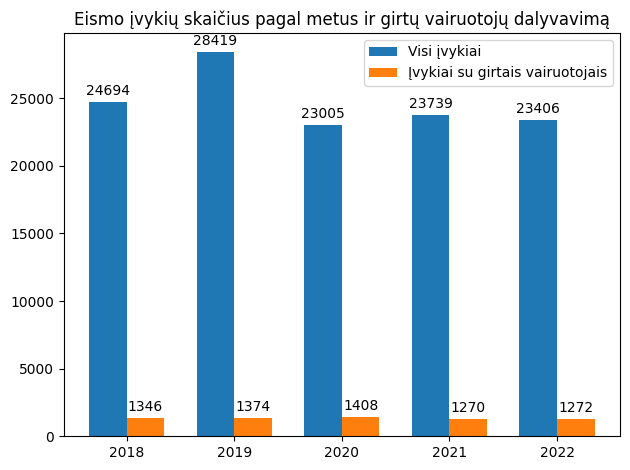

In [38]:
metai = np.array([2018, 2019, 2020, 2021, 2022])
visi_ivykiai = metine_ivykiu_tendencija.reindex(metai).fillna(0).values
ivykiai_su_girtais = girtu_vairuotoju_ivykiai_per_metus.reindex(metai).fillna(0).values

x = np.arange(len(metai))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, visi_ivykiai, width, label='Visi įvykiai')
rects2 = ax.bar(x + width/2, ivykiai_su_girtais, width, label='Įvykiai su girtais vairuotojais')

ax.set_title('Eismo įvykių skaičius pagal metus ir girtų vairuotojų dalyvavimą')
ax.set_xticks(x)
ax.set_xticklabels(metai)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [6]:
ei_2018_2022['visi_suzeistieji'] = ei_2018_2022['suzeistuSkaicius'] + ei_2018_2022['suzeistaVaiku']

In [7]:
ei_2018_2022['visi_zuvusieji'] = ei_2018_2022['zuvusiuSkaicius'] + ei_2018_2022['zuvVaiku']

In [45]:
girtu_vairuotoju_ivykiai = ei_2018_2022[
    (ei_2018_2022['neblaivusKaltininkai'] == 'Taip') |
    (ei_2018_2022['apsvaigeKaltininkai'] == 'Taip') |
    (ei_2018_2022['atsisakeTikrintisKaltininkai'] == 'Taip')
]

vid_suzeistu_girtu = round(girtu_vairuotoju_ivykiai['suzeistuSkaicius'].mean(), 3)
vid_zuvusiu_girtu = round(girtu_vairuotoju_ivykiai['zuvusiuSkaicius'].mean(), 3)

ne_girtu_ivykiai = ei_2018_2022[
    (ei_2018_2022['neblaivusKaltininkai'] != 'Taip') &
    (ei_2018_2022['apsvaigeKaltininkai'] != 'Taip') &
    (ei_2018_2022['atsisakeTikrintisKaltininkai'] != 'Taip')
]

vid_suzeistu = round(ne_girtu_ivykiai['suzeistuSkaicius'].mean(), 3)
vid_zuvusiu = round(ne_girtu_ivykiai['zuvusiuSkaicius'].mean(), 3)

print(f"Vidutinis sužeistųjų skaičius EI su girtais vairuotojais: {vid_suzeistu_girtu}")
print(f"Vidutinis žuvusiųjų skaičius EI su girtais vairuotojais: {vid_zuvusiu_girtu}")
print(f"Vidutinis sužeistųjų skaičius EI: {vid_suzeistu}")
print(f"Vidutinis žuvusiųjų skaičius EI: {vid_zuvusiu}")

Vidutinis sužeistųjų skaičius EI su girtais vairuotojais: 0.191
Vidutinis žuvusiųjų skaičius EI su girtais vairuotojais: 0.016
Vidutinis sužeistųjų skaičius EI: 0.133
Vidutinis žuvusiųjų skaičius EI: 0.006


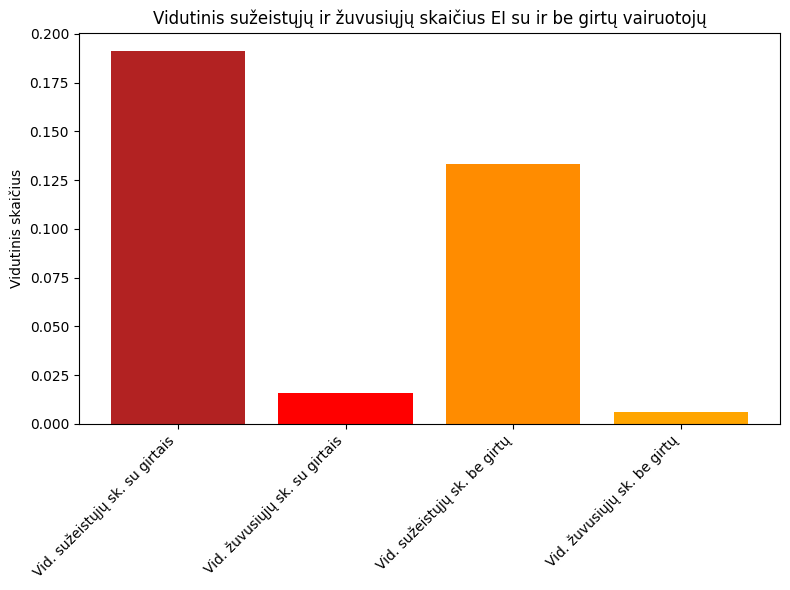

In [51]:
kategorijos = ['Vid. sužeistųjų sk. su girtais', 'Vid. žuvusiųjų sk. su girtais', 'Vid. sužeistųjų sk. be girtų', 'Vid. žuvusiųjų sk. be girtų']
reiksmes = [vid_suzeistu_girtu, vid_zuvusiu_girtu, vid_suzeistu, vid_zuvusiu]

plt.figure(figsize=(8, 6))
plt.bar(kategorijos, reiksmes, color=['firebrick', 'red', 'darkorange', 'orange'])

plt.title('Vidutinis sužeistųjų ir žuvusiųjų skaičius EI su ir be girtų vairuotojų')
plt.ylabel('Vidutinis skaičius')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [16]:
ei_2018_2022['savivaldybe'] = ei_2018_2022['savivaldybe'].replace(to_replace=r'Vilniaus miesto sav.', value='Vilniaus m. sav.', regex=True)

In [17]:
ei_2018_2022['savivaldybe'] = ei_2018_2022['savivaldybe'].replace(to_replace=r'Kauno miesto sav.', value='Kauno m. sav.', regex=True)

In [19]:
ei_2018_2022['savivaldybe'] = ei_2018_2022['savivaldybe'].replace(to_replace=r'Klaipėdos miesto sav.', value='Klaipėdos m. sav.', regex=True)

In [21]:
ei_2018_2022['savivaldybe'] = ei_2018_2022['savivaldybe'].replace(to_replace=r'Panevėžio miesto sav.', value='Panevėžio m. sav.', regex=True)

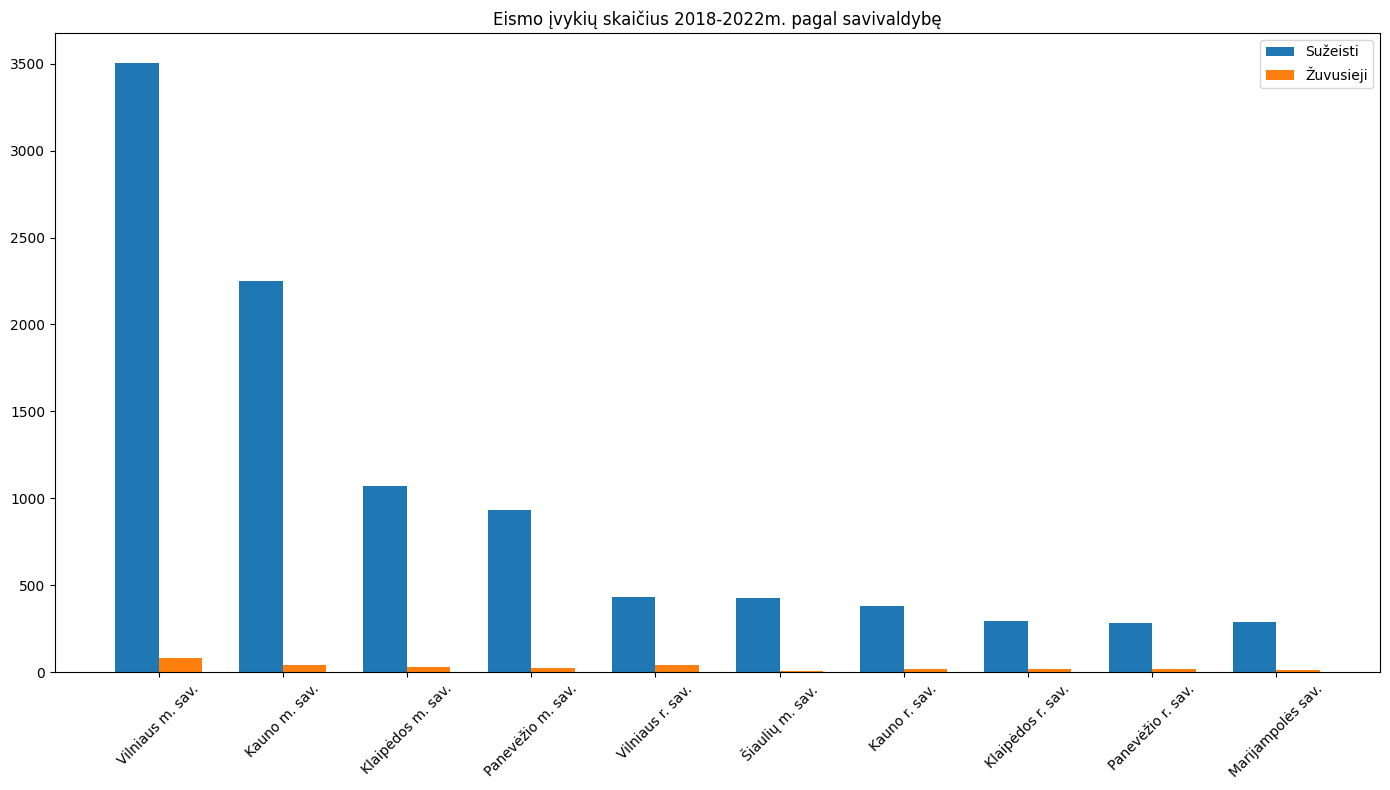

In [27]:
agg_data = ei_2018_2022.groupby('savivaldybe').agg({'visi_suzeistieji': 'sum', 'visi_zuvusieji': 'sum'}).reset_index()

agg_data['incidentai_suz_zuve'] = agg_data['visi_suzeistieji'] + agg_data['visi_zuvusieji']
agg_data = agg_data.sort_values('incidentai_suz_zuve', ascending=False).head(10)

savivaldybes = agg_data['savivaldybe']
x = np.arange(len(savivaldybes))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, agg_data['visi_suzeistieji'], width, label='Sužeisti')
rects2 = ax.bar(x + width/2, agg_data['visi_zuvusieji'], width, label='Žuvusieji')

ax.set_title('Eismo įvykių skaičius 2018-2022m. pagal savivaldybę')
ax.set_xticks(x)
ax.set_xticklabels(savivaldybes, rotation=45)
ax.legend()

fig.tight_layout()

plt.show()

# IŠVADOS
- Kuo geresnis oras (diena, sausa, giedra, vasara), tuo daugiau įvykių, nes tuo metu ir judėjimas pats didžiausias, vasarą gali akinti ryški saulė, neigiamai gali veikti aukšta temperatūra, dehidratacija. Galimai vairuotojai pernelyg pasitiki sausa kelio danga ir nesilaiko saugaus greičio.
- Eismo situacija per penkmetį turi ryškų eismo įvykių piką 2019 metais, kuris drastiškai krenta 2020 metais (Corona viruso įtaka).
- Neblaivių vairuotojų skaičius per penkmetį svyruoja nedaug. 2020 metais pastebėtas girtų vairuotojų padidėjimas (vėlgi galima Corona viruso įtaka), sekančiais metais beveik vienodas skaičius.
- Balandį - gegužę grafike "Mėnesinė eismo įvykių tendencija 2018-2022" jungia labai ryškus eismo įvykių skaičiaus
  šuolis - po žiemos į gatves išvažiuoja "vasariniai" (ne itin įgudę) vairuotojai.
- Užvažiavimas ant pėsčiojo 4578 įvykiai per penkmetį.
- Daugiausiai eismo įvykių - gruodį. Įtaką daro: šventės, važiavimas pirkti dovanų, artimųjų lankymas, ir
  žiemiškos orų sąlygos.
- Tiesiogiai koreliuoja miesto dydis ir eismo įvykių skaičius.
- Eismo įvykiuose su neblaiviais vairuotojais ir daugiau žmonių sužeidžiama, ir daugiau žūsta nei eismo įvykiuose be girtų vairuotojų.